In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def test_strategy(stock,start,end,SMA):
  df = yf.download(stock,start,end)
  df.columns = df.columns.droplevel("Ticker")
  data = df["Close"].to_frame()
  data["returns"] = np.log(data["Close"].div(data["Close"].shift(1)))
  data["SMA_S"] = data["Close"].rolling(int(SMA[0])).mean()
  data["SMA_L"] = data["Close"].rolling(int(SMA[1])).mean()
  data.dropna(inplace=True)
  data["Position"] =np.where(data["SMA_S"]>data["SMA_L"],1,-1)
  data["Strategy"] = data["returns"]*data["Position"].shift(1)
  data.dropna(inplace=True)
  ret = np.exp(data["Strategy"].sum())
  std = data["Strategy"].std()*np.sqrt(252)
  return ret,std

In [ ]:
test_strategy("ADANIENT.NS","2010-01-01","2025-04-28",[50,200])

[*********************100%***********************]  1 of 1 completed


(np.float64(1.010952941440764), np.float64(0.5339906456367601))

#Creating Class

In [ ]:
class SMBacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()

    def get_data(self):
        df = yf.download(self.symbol, self.start, self.end)
        df.columns = df.columns.droplevel("Ticker")
        data = df["Close"].to_frame()
        data["returns"] = np.log(data["Close"].div(data["Close"].shift(1)))
        data["SMA_S"] = data["Close"].rolling(self.SMA_S).mean()
        data["SMA_L"] = data["Close"].rolling(self.SMA_L).mean()
        data.dropna(inplace=True)
        self.data2 = data
        return data

    def test_results(self):
        data = self.data2.copy().dropna()
        data["Position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["Strategy"] = data["returns"] * data["Position"].shift(1)
        data.dropna(inplace=True)
        data["returnsbh"] = data["returns"].cumsum().apply(np.exp)
        data['returnsstrategy'] = data["Strategy"].cumsum().apply(np.exp)
        perf = data["returnsstrategy"].iloc[-1]
        outperf = perf - data["returnsbh"].iloc[-1]
        self.results = data
        ret = np.exp(data["Strategy"].sum())
        std = data["Strategy"].std() * np.sqrt(252)
        return round(perf, 6), round(outperf, 6)

    def plot_result(self):
        if self.results is None:
            print("Run test_results")
        else:
            title = "{} | SMA_S={} | SMA_L={}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["returnsbh", "returnsstrategy"]].plot(title=title, figsize=(12,8))






In [ ]:
tester = SMBacktester("ADANIENT.NS",3,50,"2010-04-28","2025-04-28")

[*********************100%***********************]  1 of 1 completed


In [ ]:
tester.test_results()

(np.float64(759.347016), np.float64(724.46052))

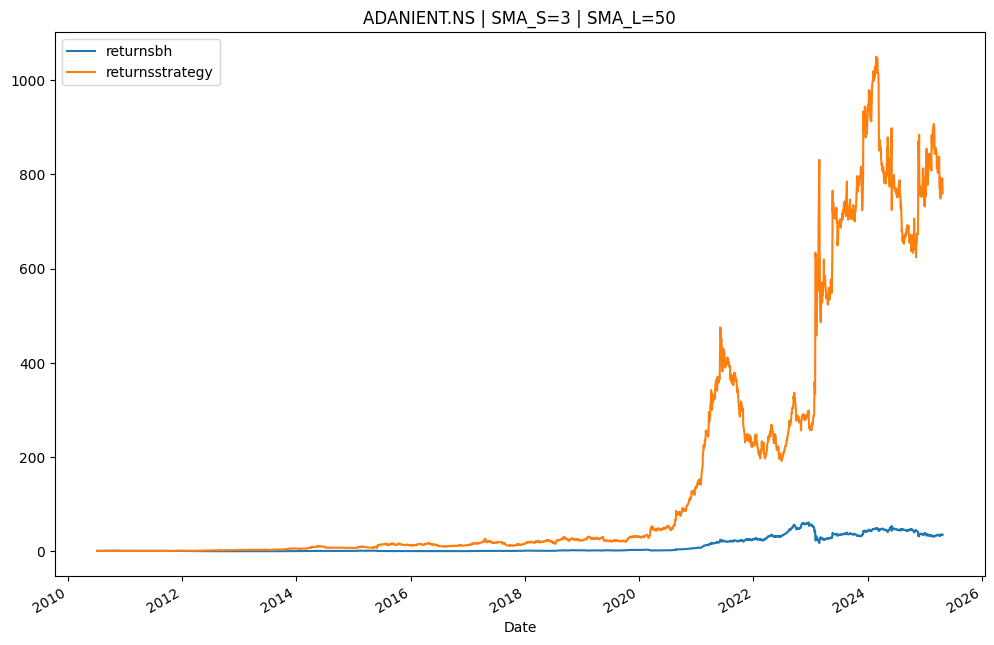

In [ ]:
tester.plot_result()